In [32]:
# USE HARDWARE ACCELERATION (edit=> runtime setting->gpu) for better result

<h1> THE CODE IS FOR 'GUESSING THE CORRELATION OF IMAGES' </h1>
using  https://www.kaggle.com/athosdamiani/guess-the-correlation data set
<h2> By Group 8 (COE17B020 ,CED17I047,COE17B031)</h2>

Execute each cell one by one<br>
FOR data upload to google colab ,<br>
UPLOAD csv file (execute cell below)
UPLOAD entrire zip and extract using !unzip

In [67]:
%tensorflow_version 2.x
import tensorflow as tf
# go to edit ,runtime settings and set hardware accleration to gpu
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import time
import os

<h3> Upload csv in local session</h3>


In [49]:
# //upload csv

from google.colab import files
path_to_csv_file = list(files.upload().keys())[0]  #//upload csv train_response.csv

Saving train_responses.csv to train_responses (1).csv


<h3> Upload entire zip in local session</h3>
Note :upload all FILES  ELSE THE CODE WILL NOT CORRECTLY EVALUATE






In [ ]:
# //extract zip using
#drop entire zip in local session on left side of page if running on google colab
#  upload zip to local session by drag and drop and run the below command 
!unzip 19003_24748_upload_train_imgs.zip


In [34]:
# //upload images
# from google.colab import files
# path_to_file = list(files.upload().keys())




In [51]:
# plt.imshow(img1,cmap = plt.cm.binary)
# len(img1[0][0]) #colour integrity maintained

<h2>Dataframe containing C.S.V.</h2>


In [68]:
# csv dataframe
df = pd.read_csv('train_responses.csv') 

# df = pd.read_csv(path_to_csv_file) 

<h2>Function processing Images and labels</h2><br> this section will take time and ram according to number of data you want to train on


In [70]:
def getfiles(no_of_images,dataframe):
  list1 = random.sample(range(0,150000),no_of_images)
  label = dataframe.iloc[list1,1].tolist()
  fielname = dataframe.iloc[list1,0].tolist()
  return label,fielname


def images_to_matr(filelists,dtaframe,size = (130,130),path = False):
    #specify size to resize and path for directory stored in
    matrm = []
    
    for filename in filelists:
        if path ==False:
            str1 = filename+".png"
            img = cv2.imread(str1)
            #remoe all axis part
            img = img[:130,20:,:]
            if size!=(130,130):
                img = cv2.resize(img,size)
            img = img/255.0 # maintain matrix data in range 0 to 1
            img = img.tolist()
        else:
            str1 = filename+".png"
            new_pat = os.path.join(path,str1)
            img = cv2.imread(new_pat)
            img = img[:130,20:,:]
            if size!=(130,130):
                img = cv2.resize(img,size)
            img = img/255.0 # maintain matrix data in range 0 to 1
            img = img.tolist()
        matrm.append(img)

    return matrm



# matrm = images_to_matr(fielname,df)  
# matrm = images_to_matr(fielname,df,path = 'train_imgs')  




In [71]:
#below will take 4000 random files and its corelation for training and testing
label,fielname = getfiles(4000,df) #note vary the images according to ram available 
#NOTE temper the size1 variable according to above no of files

size1 = (80,80)
matrm = images_to_matr(fielname,df,size = size1,path = 'train_imgs')  
input_size1 = (size1[0],size1[1],3)

#note the above code assumed that file name is same as given in csV AND ALL FILES ARE AVIALABLE

<h3>Combining label and matrix in pandas dataframe</h3>

In [72]:
combinelist = list(zip(label,matrm))
pdsdata = pd.DataFrame(combinelist,columns = ["Score","Matrix"]) #create pandas dataframe with both columns combined
labelsdata = pdsdata.iloc[0,:]

In [73]:
len(matrm[0][0]) #size of image selected

80

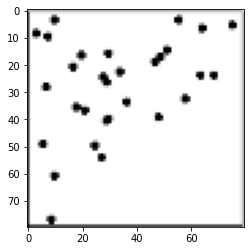

In [74]:
#tune below param to seee different images
SEE_IMAGE = 3
plt.imshow(matrm[SEE_IMAGE],cmap = plt.cm.binary)

<h1> Model <h4>Input Pooling <br> CNN layer<br>Pooling <br>CNN layer <br></h4></h1>


In [75]:
new_label = []
for i in label:
  new_label.append(i)
model1 = models.Sequential()
# model1.add(layers.Conv2D(150, (3, 3), activation='relu', input_shape=(130,130,3)))
# model1.add(layers.Conv2D(150, (3, 3), activation='relu', input_shape=(80,80,3)))
model1.add(layers.Conv2D(150, (3, 3), activation='relu', input_shape=input_size1))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

<h2> Flattening ,64 nodes layer ,1 output layer</h2>


In [76]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
# model1.add(layers.Dense(2))
model1.add(layers.Dense(1,activation='linear'))

<h5>Splitting into test and train data</h5>

In [77]:
#conversion to numpy ,test_train_split and model.fit only work on numpy array
matrm2 = np.array(matrm)
new_label2 = np.array(new_label)

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(matrm2,new_label2,test_size = 0.2,shuffle = True)

Compiling model ,Optimiser adam used

In [78]:
model1.compile(optimizer='adam',
              loss='mean_squared_error',metrics=['accuracy'])

In [80]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 78, 78, 150)       4200      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 39, 39, 150)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 64)        86464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

Training

In [79]:
history = model1.fit(X_train, y_train, batch_size = 120 ,epochs=154,verbose = 1 ,
                    validation_data=(X_test, y_test))

Epoch 1/154
27/27 [==============================] - 4s 150ms/step - loss: 0.2098 - accuracy: 0.0000e+00 - val_loss: 0.1307 - val_accuracy: 0.0000e+00
Epoch 2/154
27/27 [==============================] - 4s 143ms/step - loss: 0.0544 - accuracy: 0.0000e+00 - val_loss: 0.0345 - val_accuracy: 0.0000e+00
Epoch 3/154
27/27 [==============================] - 4s 141ms/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0266 - val_accuracy: 0.0000e+00
Epoch 4/154
27/27 [==============================] - 4s 143ms/step - loss: 0.0220 - accuracy: 0.0000e+00 - val_loss: 0.0214 - val_accuracy: 0.0000e+00
Epoch 5/154
27/27 [==============================] - 4s 142ms/step - loss: 0.0174 - accuracy: 0.0000e+00 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 6/154
27/27 [==============================] - 4s 142ms/step - loss: 0.0115 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 7/154
27/27 [==============================] - 4s 143ms/step - loss: 0.0082 - accuracy: 

In [81]:
model1.save_weights('bkupmain.h5', overwrite=True)
#next time no need to train, load weights from stored data

In [82]:
test_loss, test_acc = model1.evaluate(X_test, y_test,verbose = 1)
#evaluated on test data loss <=0.04

25/25 [==============================] - 0s 19ms/step - loss: 0.0043 - accuracy: 0.0000e+00


<h2>Below is comparision of correlation predicted vs actual</h2>
change TEST_ON_INDEX variable or different comparision


In [84]:
from tensorflow.keras import backend as K

TEST_ON_INDEX = 107
def test_for_ind_val(index,model1):
    
  inp = model1.input                                           # input placeholder
  outputs = [layer.output for layer in model1.layers]          # all layer outputs
  functors = [K.function([inp], [out]) for out in outputs] 

  x1 = np.array(matrm[index])[np.newaxis,...]
  layer_outs = [func([x1, 1.]) for func in functors]
  # print(layer_outs[-1])
  print(" Predicted = {},Expected = {} , ".format(layer_outs[-1][0],new_label[index]))
  # print(new_label[index])
  pass



test_for_ind_val(TEST_ON_INDEX,model1)

 Predicted = [[-0.11774082]],Expected = -0.11626079570479747 , 
